In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('winequality.csv', delimiter = ';')

In [3]:
# Verifica se há valores faltantes
print('Verificação de valores NULL nos dados: \n\n', df.isnull().sum(),
      '\n------------------------------------------')
# Como não foram encontrados valores nulos ou inexistentes,
# não há necessidade de preenchimento de dados generalistas

# A função describe nos trás informações sobre a consistência
# dos dados das variáveis, nota-se que a variável alcohol
# não apresentou restorno com esta função
print('Consistência dos dados: \n\n', df.describe(),
      '\n------------------------------------------')

Verificação de valores NULL nos dados: 

 type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64 
------------------------------------------
Consistência dos dados: 

        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000 

In [4]:
cols = df.columns[1:] # Lista com titulos das colunas
index_str = [] # Lista com a posição dos dados a serem retirados

# Exclui dados incorretos
for item in cols:
    try:
        df[item].astype(float)
    except ValueError:
        for i in range(len(df[item].values)):
            try:
                np.float(df[item].values[i])
            except ValueError:
                index_str.append(i)
                       
    df = df.drop(df.index[index_str])        
    index_str = []

Gerando Boxplot... 
------------------------------------------
Red Wine - Erro nos dados da variável alcohol
White Wine - Erro nos dados da variável alcohol

------------------------------------------


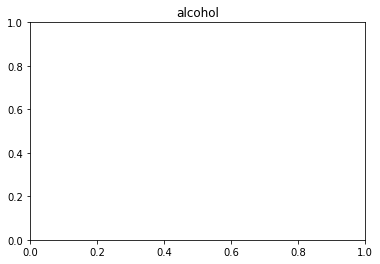

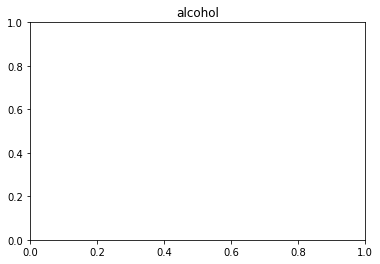

In [5]:
# Separação dos dados em Red Wine e White Wine
df_white = df.loc[df['type'] == 'White']
df_red = df.loc[df['type'] == 'Red']

print('Gerando Boxplot... \n------------------------------------------')
# Boxplot para verificação de outliers
for item in cols:
    try:
        fig1, ax1 = plt.subplots()
        ax1.set_title(item)
        ax1.boxplot(df_red[item])
        ax1.set_title('Red Wine - {}'.format(item))
        plt.savefig('Red Wine - {}'.format(item))
        plt.close(fig1)
    except TypeError:
        print('Red Wine - Erro nos dados da variável {}'.format(item))
        
    try:
        fig2, ax2 = plt.subplots()
        ax2.set_title(item)
        ax2.boxplot(df_white[item])
        ax2.set_title('White Wine - {}'.format(item))
        plt.savefig('White Wine - {}'.format(item))
        plt.close(fig2)
    except TypeError:
        print('White Wine - Erro nos dados da variável {}'.format(item))    

print('\n------------------------------------------')

In [6]:
# Eliminação de outliers seguindo a separação por quantil
# com margem de 10%, essa margem por ser variada dependendo
# do quão próximo queremos que os dados estejam da média de
# cada variável.
# Optou-se por eliminar as linhas com dados errados para a
# variável alcohol, poderia ser utilizada a técnica por
# substituição pela média. Alguns outliers seguiram no
# conjunto de dados para obtermos um modelo mais robusto e
# mais generalizado
print('Filtrando Outliers... \n------------------------------------------')
for item in cols:

    df_red[item] = pd.to_numeric(df_red[item],errors='coerce')
    df_white[item] = pd.to_numeric(df_white[item],errors='coerce')
    
    q1 = df_red[item].quantile(0.10)
    q3 = df_red[item].quantile(0.90)
    iqr = q3-q1
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    df_red = df_red.loc[(df_red[item] > low) & (df_red[item] < high)]

    q1 = df_white[item].quantile(0.10)
    q3 = df_white[item].quantile(0.90)
    iqr = q3-q1
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    df_white = df_white.loc[(df_white[item] > low) & (df_white[item] < high)]

Filtrando Outliers... 
------------------------------------------


C:\Users\noron\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\noron\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
# Bloxplot de todas as variáveis após o filtro de outliers
print('Gerando Boxplot após o filtro dos outliers... \n------------------------------------------')
for item in cols:
    fig1, ax1 = plt.subplots()
    ax1.set_title(item)
    ax1.boxplot(df_red[item])
    ax1.set_title('Red Wine - Filtro - {}'.format(item))
    plt.savefig('Red Wine Filtro - {}'.format(item))
    plt.close(fig1)
    
    fig2, ax2 = plt.subplots()
    ax2.set_title(item)
    ax2.boxplot(df_white[item])
    ax2.set_title('White Wine - Filtro - {}'.format(item))
    plt.savefig('White Wine Filtro - {}'.format(item))
    plt.close(fig2)

Gerando Boxplot após o filtro dos outliers... 
------------------------------------------


Gerando Gráficos de Correlações... 
------------------------------------------


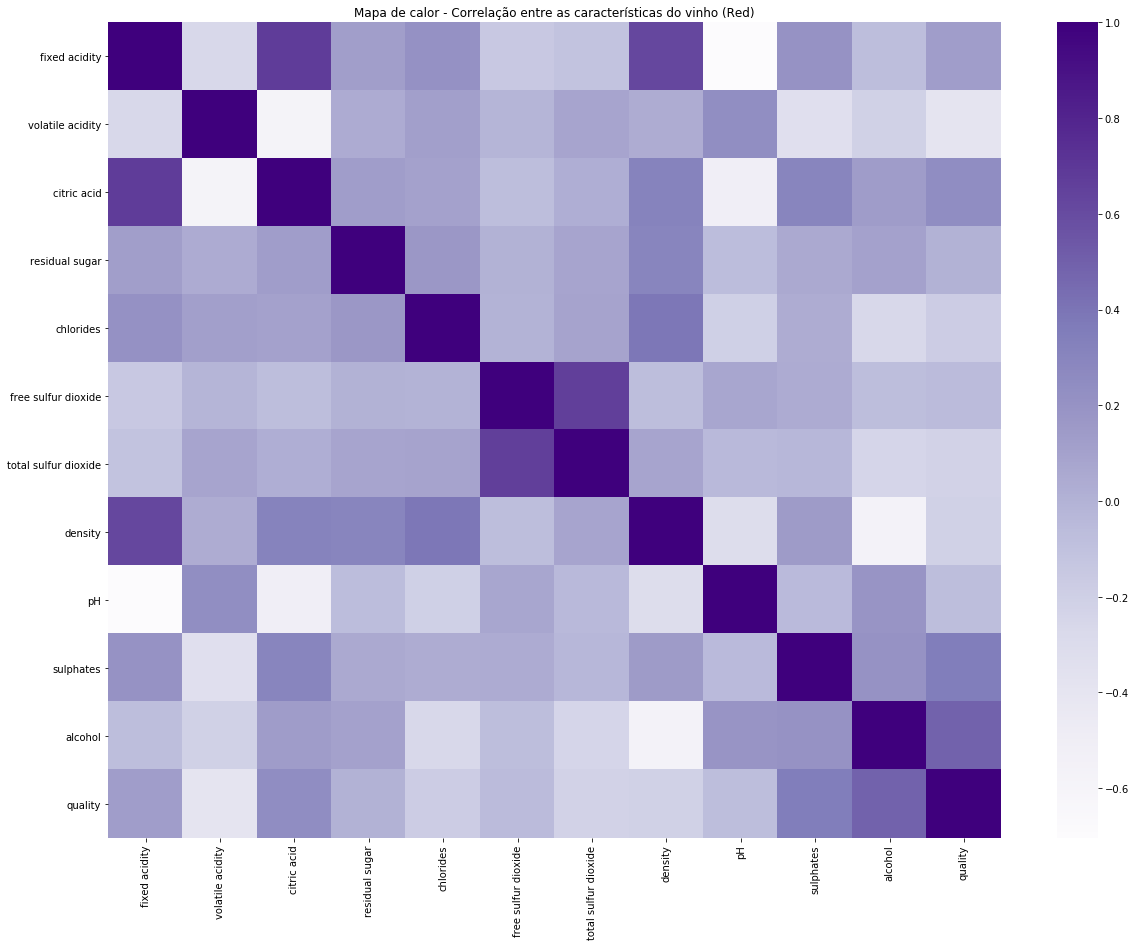

In [8]:
# Análise da correlação entre as variáveis
print('Gerando Gráficos de Correlações... \n------------------------------------------')
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Mapa de calor - Correlação entre as características do vinho (Red)")
corr = df_red.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="Purples")
plt.savefig('Correlação Variáveis Red Wine')

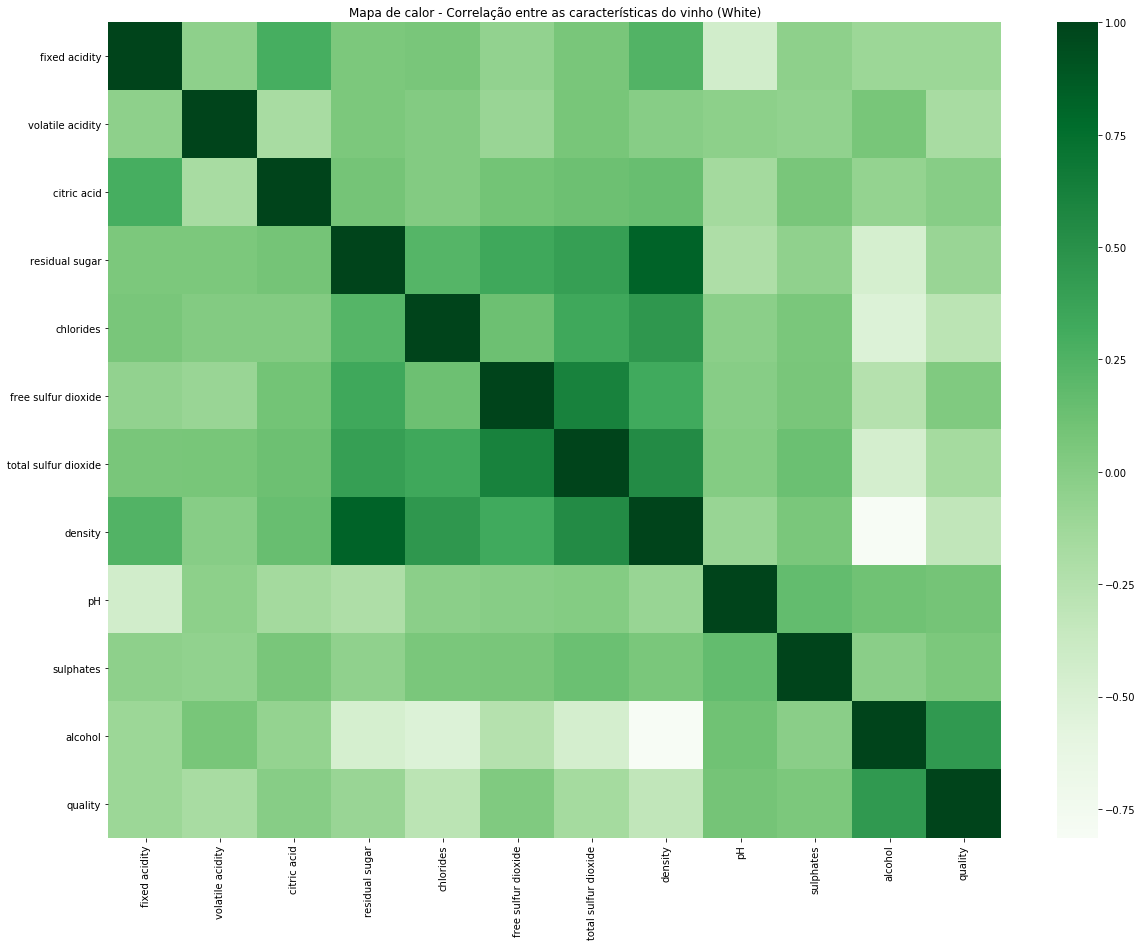

In [9]:
# Para o Red Wine, as variáveis com maiores correlações em
# relação ao target (variável quality) são: Alcohol e Sulphates
# Decidiu-se fazer uma classificação sobre a qualidade do
# Red Wine baseando-se nessas duas variáveis e posteriormente
# com todas as variáveis disponíveis para fins de comparação

plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Mapa de calor - Correlação entre as características do vinho (White)")
corr = df_white.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="Greens")
plt.savefig('Correlação Variáveis White Wine')

# Para o White Wine, as variáveis com maiores correlações em
# relação ao target (variável quality) são: Alcohol e pH
# Decidiu-se fazer uma classificação sobre a qualidade do
# White Wine baseando-se nessas duas variáveis e posteriormente
# com todas as variáveis disponíveis para fins de comparação

In [10]:
# Método de classificação: Regressão Linear com dados originais
def regressao_linear(X, y, max_quality):
    regr = linear_model.LinearRegression()
    regr.fit(X,y)
    ytr_pred = regr.predict(X)
    return mean_squared_error(max_quality*y, max_quality*ytr_pred)

# Método de classificação: Rede Neural MLP
def rede_neural_MLP(X, y, max_quality):
    clf = MLPClassifier(activation='logistic',
                    solver='sgd',
                    alpha=1e-5,
                    hidden_layer_sizes=(5, 2),
                    random_state=1,
                    max_iter=10000)
    clf.fit(Xtr, ytr)
    ytr_pred = clf.predict(Xtr)
    return mean_squared_error(max_quality*y, max_quality*ytr_pred)

In [11]:
print('Classificação através da Regressão Linear... \n------------------------------------------')

# Red Wine --------------------------------------------
# Apenas com variáveis sulphates e alcohol
ytr = df_red['quality']
Xtr = df_red[['sulphates','alcohol']]
mse_tr = regressao_linear(Xtr,ytr,1)
print('\nMSE Regressão Linear (Red Wine - 2 variáveis) = ',mse_tr)
# Todas as variáveis
ytr = df_red['quality']
Xtr = df_red[cols]
mse_tr = regressao_linear(Xtr,ytr,1)
print('\nMSE Regressão Linear (Red Wine - todas as variáveis) = ',mse_tr)

# White Wine --------------------------------------------
# Apenas com variáveis sulphates e alcohol
ytr = df_white['quality']
Xtr = df_white[['pH','alcohol']]
mse_tr = regressao_linear(Xtr,ytr,1)
print('\nMSE Regressão Linear (White Wine - 2 variáveis) = ',mse_tr)
# Todas as variáveis
ytr = df_white['quality']
Xtr = df_white[cols]
mse_tr = regressao_linear(Xtr,ytr,1)
print('\nMSE Regressão Linear (White Wine - todas as variáveis) = ',mse_tr)


Classificação através da Regressão Linear... 
------------------------------------------

MSE Regressão Linear (Red Wine - 2 variáveis) =  0.4483055268569017

MSE Regressão Linear (Red Wine - todas as variáveis) =  1.0327957385854747e-29

MSE Regressão Linear (White Wine - 2 variáveis) =  0.6254530364478691

MSE Regressão Linear (White Wine - todas as variáveis) =  5.312706087969579e-29


In [12]:
# Método de classificação: Rede Neural MLP
# Red Wine --------------------------------------------

# Apenas com variáveis sulphates e alcohol
ytr = df_red['quality']
Xtr = df_red[['sulphates','alcohol']]
mse_rn_tr = rede_neural_MLP(Xtr, ytr, 1)
print('\nMSE Rede MLP (Red Wine - 2 variáveis) = ', mse_rn_tr)
# Todas as variáveis
ytr = df_red['quality']
Xtr = df_red[cols]
mse_rn_tr = rede_neural_MLP(Xtr, ytr, 1)
print('\nMSE Rede MLP (Red Wine - todas as variáveis) = ', mse_rn_tr)

# White Wine --------------------------------------------
# Apenas com variáveis sulphates e alcohol
ytr = df_white['quality']
Xtr = df_white[['pH','alcohol']]
mse_rn_tr = rede_neural_MLP(Xtr, ytr, 1)
print('\nMSE Rede MLP (White Wine - 2 variáveis) = ', mse_rn_tr)
# Todas as variáveis
ytr = df_white['quality']
Xtr = df_white[cols]
mse_rn_tr = rede_neural_MLP(Xtr, ytr, 1)
print('\nMSE Rede MLP (White Wine - todas as variáveis) = ', mse_rn_tr)


MSE Rede MLP (Red Wine - 2 variáveis) =  1.0572413793103448

MSE Rede MLP (Red Wine - todas as variáveis) =  1.0572413793103448

MSE Rede MLP (White Wine - 2 variáveis) =  0.7898130238555771

MSE Rede MLP (White Wine - todas as variáveis) =  0.7898130238555771


In [13]:
# Normalizando as variáveis: fez-se treinamentos diferenciados
# com as variáveis normalizadas e não-normalizadas, com o
# objetivo de comparar desempenhos, uma vez que variáveis não-
# normalizadas com grandezas diversas podem influenciar na
# convergência das técnicas

max_norm_red = np.max(np.abs(df_red['quality']))
max_norm_white = np.max(np.abs(df_white['quality']))
for item in cols:
    df_red[item] = df_red[item]/np.max(np.abs(df_red[item]))
    df_white[item] = df_white[item]/np.max(np.abs(df_white[item]))
    

# Método de classificação: Regressão Linear com dados normalizados
# Apenas com variáveis sulphates e alcohol
# Red Wine --------------------------------------------
ytr_norm = df_red['quality']
Xtr_norm = df_red[['sulphates','alcohol']]
mse_tr_all = regressao_linear(Xtr_norm, ytr_norm, max_norm_red)
print('\nMSE Regressão Linear (Red Wine - 2 variáveis normalizadas) = ',mse_tr_all)
# Todas as variáveis
ytr_norm = df_red['quality']
Xtr_norm = df_red[cols]
mse_tr_all = regressao_linear(Xtr_norm, ytr_norm, max_norm_red)
print('\nMSE Regressão Linear (Red Wine - Todas as variáveis normalizadas) = ',mse_tr)

# White Wine --------------------------------------------
ytr_norm = df_white['quality']
Xtr_norm = df_white[['pH','alcohol']]
mse_tr_all = regressao_linear(Xtr_norm, ytr_norm, max_norm_white)
print('\nMSE Regressão Linear (White Wine - 2 variáveis normalizadas) = ',mse_tr_all)
# Todas as variáveis
ytr_norm = df_white['quality']
Xtr_norm = df_white[cols]
mse_tr_all = regressao_linear(Xtr_norm, ytr_norm, max_norm_white)
print('\nMSE Regressão Linear (White Wine - Todas as variáveis normalizadas) = ',mse_tr_all)


MSE Regressão Linear (Red Wine - 2 variáveis normalizadas) =  0.4483055268569017

MSE Regressão Linear (Red Wine - Todas as variáveis normalizadas) =  5.312706087969579e-29

MSE Regressão Linear (White Wine - 2 variáveis normalizadas) =  0.6254530364478692

MSE Regressão Linear (White Wine - Todas as variáveis normalizadas) =  7.210032698643151e-31
